# Inisialisasi

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 20.2 MB/s 
     |████████████████████████████████| 9.8 MB 64.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/RP 2022/

Mounted at /gdrive
/gdrive/MyDrive/RP 2022


#Start

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/gdrive/MyDrive/Metode Peramalan/NGDPRNSAXDCIDQ.csv',
                    delimiter="," ,
                    header=0,
                    names = ['Date','NGDPRNSAXDCIDQ'],
                    index_col="Date",
                    )

In [ ]:
data.head()

,NGDPRNSAXDCIDQ
Date,
2008-01-01,1.475278e+09
2008-04-01,1.536362e+09
2008-07-01,1.605666e+09
2008-10-01,1.545541e+09
2009-01-01,1.548191e+09


# Analisis Awal

In [ ]:
data.index

Index(['2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01',
       '2009-04-01', '2009-07-01', '2009-10-01', '2010-01-01', '2010-04-01',
       '2010-07-01', '2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01',
       '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
       '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01', '2014-01-01',
       '2014-04-01', '2014-07-01', '2014-10-01', '2015-01-01', '2015-04-01',
       '2015-07-01', '2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01',
       '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
       '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01', '2019-01-01',
       '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01',
       '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01',
       '2021-10-01', '2022-01-01'],
      dtype='object', name='Date')

Text(0, 0.5, 'GDP Indonesia')

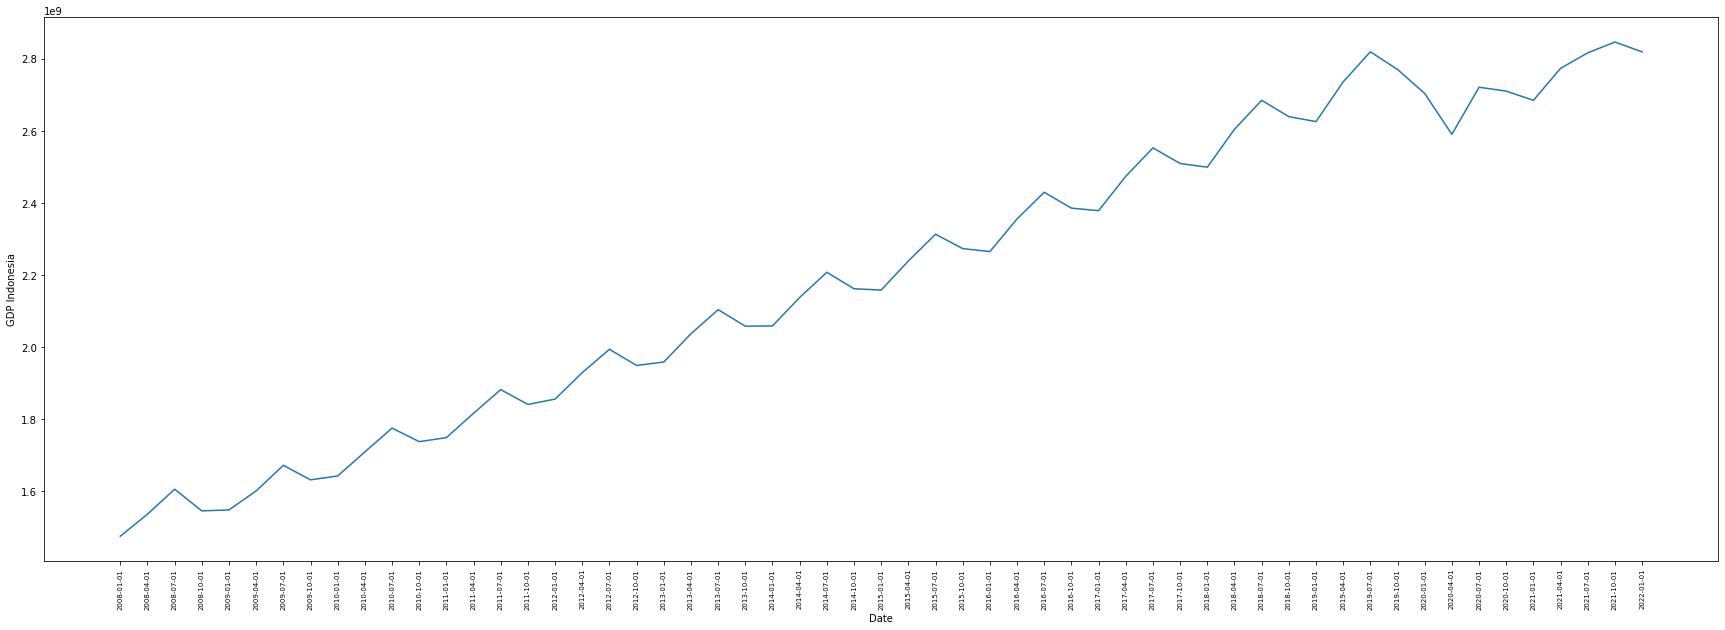

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima

plt.figure(figsize=(30,10))
sns.lineplot(data=data,x=data.index,y=data.NGDPRNSAXDCIDQ,)

plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')

plt.ylabel("GDP Indonesia")

In [ ]:
from pmdarima.arima import ADFTest
ADFTest(alpha=0.05).should_diff(data['NGDPRNSAXDCIDQ'])

(0.9183258341290659, True)

Berdasarkan ADF Test, kita dapatkan bahwa data ini masih belum stasioner

In [ ]:
train = data[:55]
test = data[55:]

In [ ]:
train.tail()

,NGDPRNSAXDCIDQ
Date,
2020-07-01,2.720492e+09
2020-10-01,2.709741e+09
2021-01-01,2.684201e+09
2021-04-01,2.772939e+09
2021-07-01,2.815870e+09


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(train['NGDPRNSAXDCIDQ'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                   random_state=22,
                   seasonal=True,
                   D=1,
                   m=4,
                   stationary=False)
model.fit(train['NGDPRNSAXDCIDQ'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=2006.354, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=1968.262, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=2050.996, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=1969.879, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=2035.314, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=1969.475, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=1969.336, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=2049.044, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=1970.079, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=1980.672, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,1,0)[4] intercept
Total fit time: 1.250 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 4),
      suppress_warnings=True)

In [ ]:
model.fit_predict(train['NGDPRNSAXDCIDQ'],n_periods=10)

array([2.80424872e+09, 2.77870872e+09, 2.86744732e+09, 2.91037762e+09,
       2.89875663e+09, 2.87321663e+09, 2.96195523e+09, 3.00488553e+09,
       2.99326455e+09, 2.96772455e+09])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   55
Model:             SARIMAX(0, 1, 0, 4)   Log Likelihood                -982.131
Date:                 Sun, 03 Jul 2022   AIC                           1968.262
Time:                         14:58:41   BIC                           1972.126
Sample:                              0   HQIC                          1969.739
                                  - 55                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.451e+07   7.82e+06     12.080      0.000    7.92e+07     1.1e+08
sigma2      3.121e+15      0.197   1.58e+16      0.000    3.12e+15    3.12e+15
===================================================================================
Ljung-Box (L1) (Q):                  23.49   Jarque-Bera (JB):               207.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              36.10   Skew:                            -2.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.82e+30. Standard errors may be unstable.
"""

In [ ]:
forecast = model.predict(n_periods=len(test['NGDPRNSAXDCIDQ']))
forecast = pd.DataFrame(forecast,index = test['NGDPRNSAXDCIDQ'].index,columns=['Prediction'])

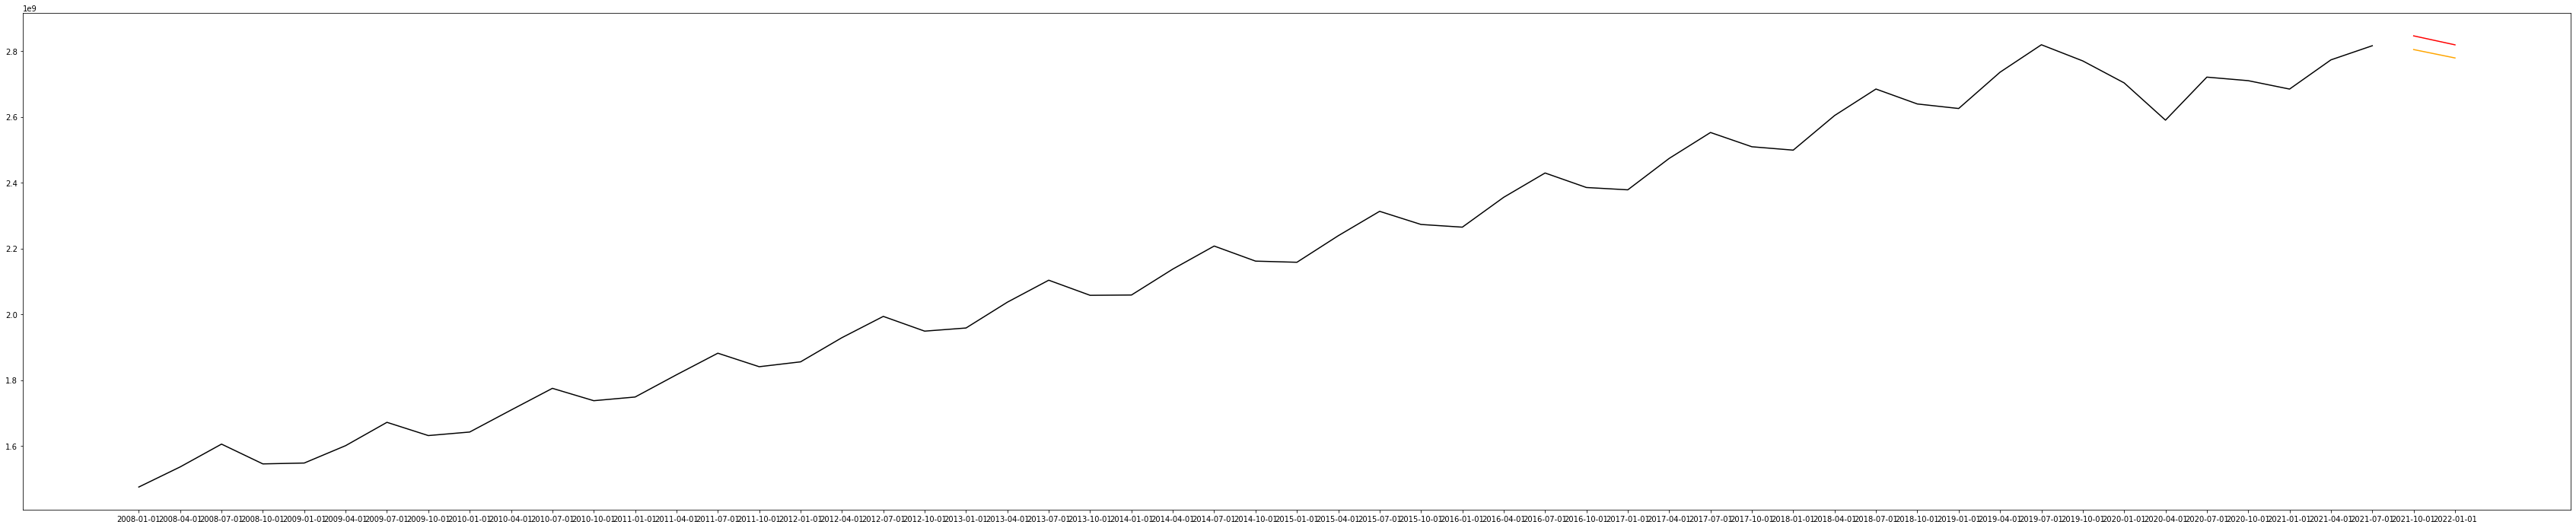

In [ ]:
plt.figure(figsize=(60,12))

plt.plot(train['NGDPRNSAXDCIDQ'], color = "black")
plt.plot(test['NGDPRNSAXDCIDQ'], color = "red")

plt.plot(forecast,color="orange")

# DIFF

In [ ]:
difference = data.diff()

In [ ]:
difference.head()

,NGDPRNSAXDCIDQ
Date,
2008-01-01,NaN
2008-04-01,61083900.0
2008-07-01,69304000.0
2008-10-01,-60124700.0
2009-01-01,2649700.0


In [ ]:
difference.dropna(inplace=True)

Text(0, 0.5, 'GDP Growth Indonesia')

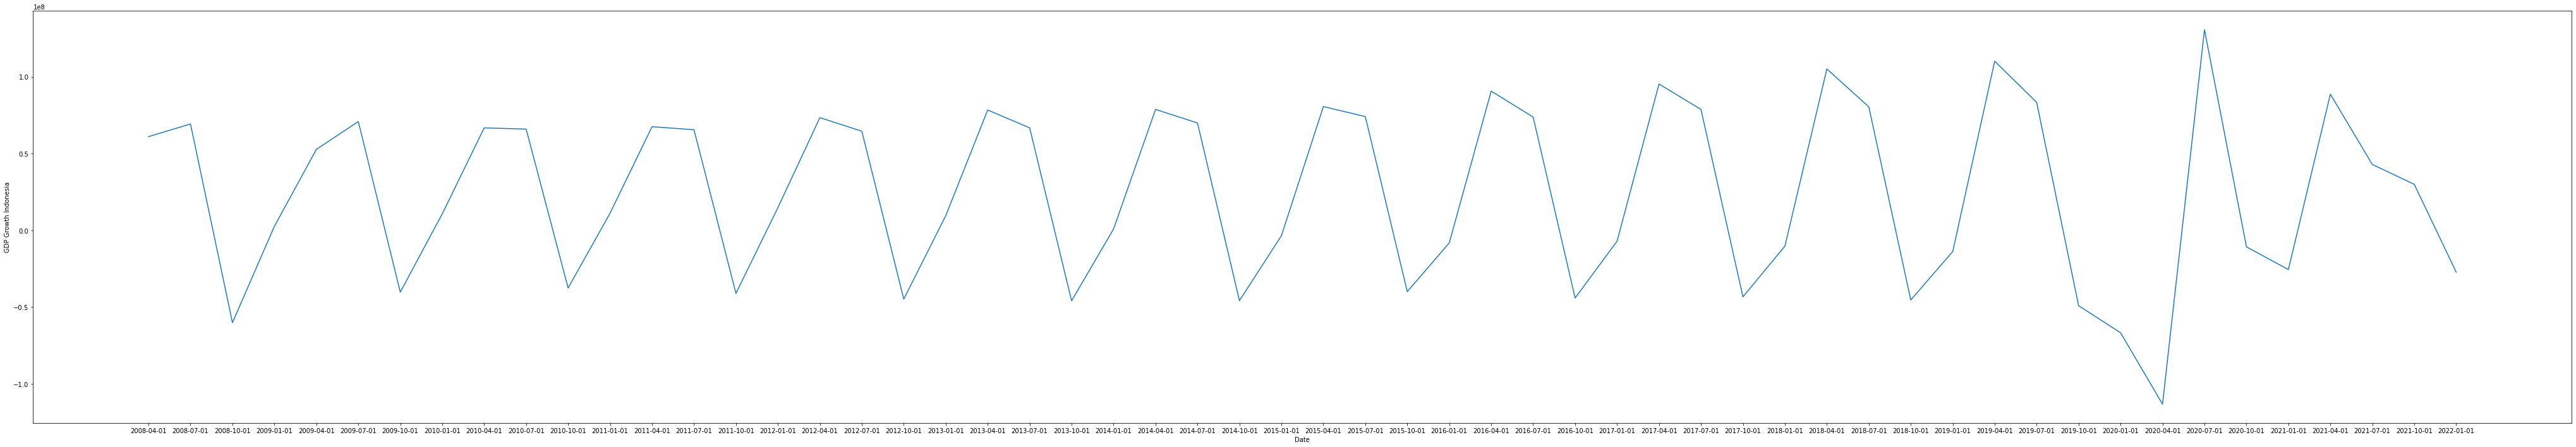

In [ ]:
plt.figure(figsize=(72,12))
sns.lineplot(data=difference,x=difference.index,y=difference.NGDPRNSAXDCIDQ)
plt.ylabel("GDP Growth Indonesia")

In [ ]:
adf_test = ADFTest(alpha=0.05)
type(adf_test)
adf_test.should_diff(difference['NGDPRNSAXDCIDQ'])

(0.047206956738607656, False)

Difference 1 Cukup untuk membuat model menjadi stasioner

In [ ]:
train = difference[:54]
test = difference[54:]

In [ ]:
model = auto_arima(train['NGDPRNSAXDCIDQ'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                   random_state=22,
                   seasonal=True,
                   D=1,
                   m=4,
                   stationary=True)
model.fit(train['NGDPRNSAXDCIDQ'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=2087.322, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=2072.218, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=2076.564, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=2094.488, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=2089.298, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[4] intercept   : AIC=2071.408, Time=0.20 sec
 ARIMA(1,0,0)(2,0,1)[4] intercept   : AIC=2070.804, Time=0.97 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=2074.172, Time=0.87 sec
 ARIMA(1,0,0)(2,0,2)[4] intercept   : AIC=2072.597, Time=0.36 sec
 ARIMA(1,0,0)(1,0,2)[4] intercept   : AIC=2071.628, Time=0.28 sec
 ARIMA(0,0,0)(2,0,1)[4] intercept   : AIC=2068.759, Time=0.71 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(2,0,0)[4] intercept   : AIC=2069.700, Time=0.11 sec
 ARIMA(0,0,0)(2,0,2)[4] intercept   : AIC=2

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 4),
      suppress_warnings=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -1022.615
Date:                Sun, 03 Jul 2022   AIC                           2055.231
Time:                        14:59:01   BIC                           2065.176
Sample:                             0   HQIC                          2059.066
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.998e+07   3.77e-09   1.33e+16      0.000       5e+07       5e+07
ar.L1         -0.1992      0.125     -1.597      0.110      -0.444       0.045
ar.L2         -0.7042      0.092     -7.637      0.000      -0.885      -0.523
ar.L3         -0.2074      0.135     -1.532      0.126      -0.473       0.058
sigma2      1.603e+15   4.64e-17   3.45e+31      0.000     1.6e+15     1.6e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               269.53
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               5.52   Skew:                            -2.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.39e+47. Standard errors may be unstable.
"""

In [ ]:
forecast = model.predict(n_periods=len(test['NGDPRNSAXDCIDQ']))
forecast = pd.DataFrame(forecast,index = test['NGDPRNSAXDCIDQ'].index,columns=['Prediction'])

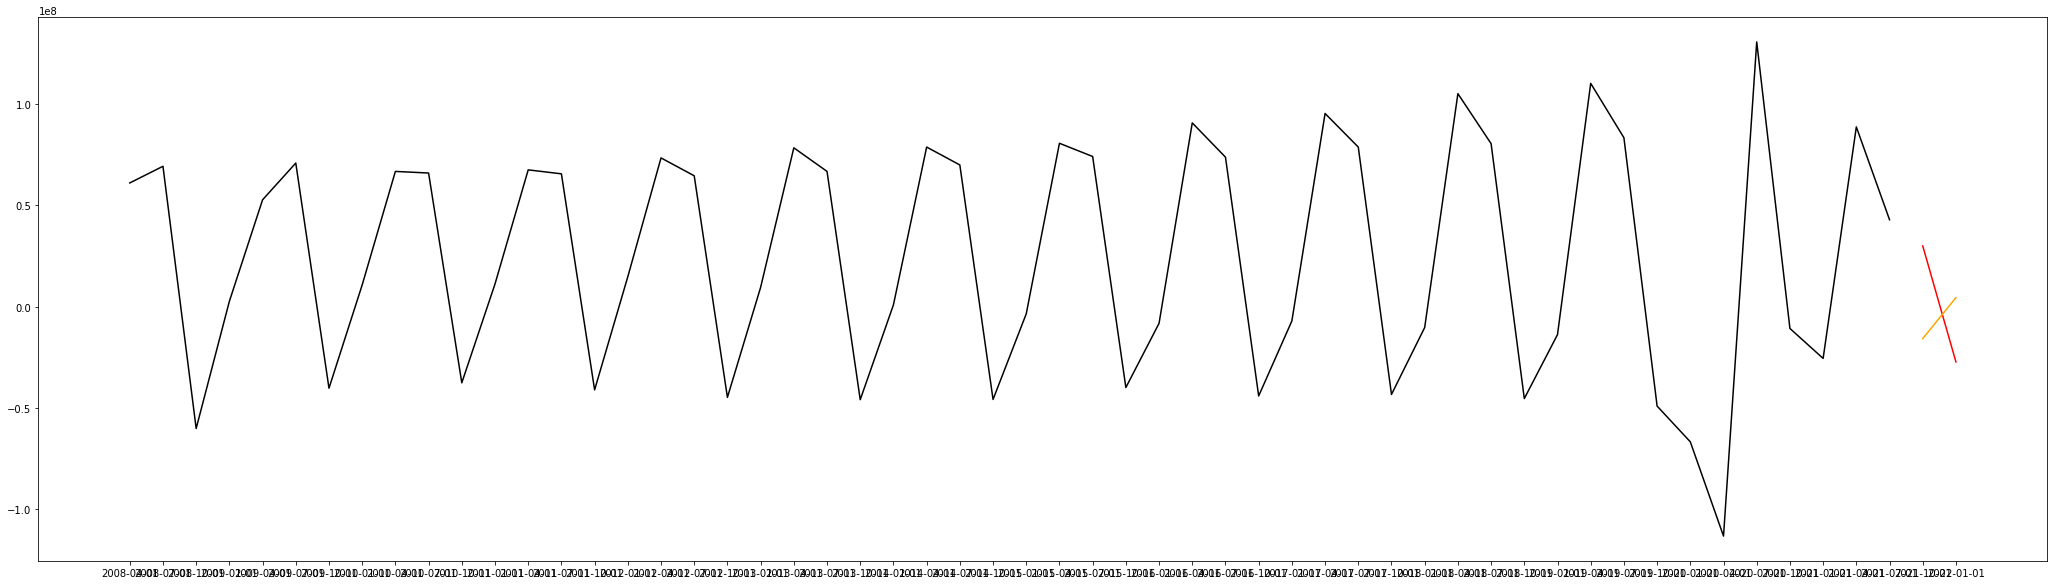

In [ ]:
plt.figure(figsize=(36,10))

plt.plot(train['NGDPRNSAXDCIDQ'], color = "black")

plt.plot(test['NGDPRNSAXDCIDQ'], color = "red")
plt.plot(forecast,color="orange")


# TRY MSARMs

In [ ]:
from datetime import datetime
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import statsmodels.api as sm

# NBER recessions
from pandas_datareader.data import DataReader

In [ ]:
detes = sm.tsa.MarkovAutoregression(
    data, k_regimes=2, order=3, switching_ar=False
)
results = detes.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


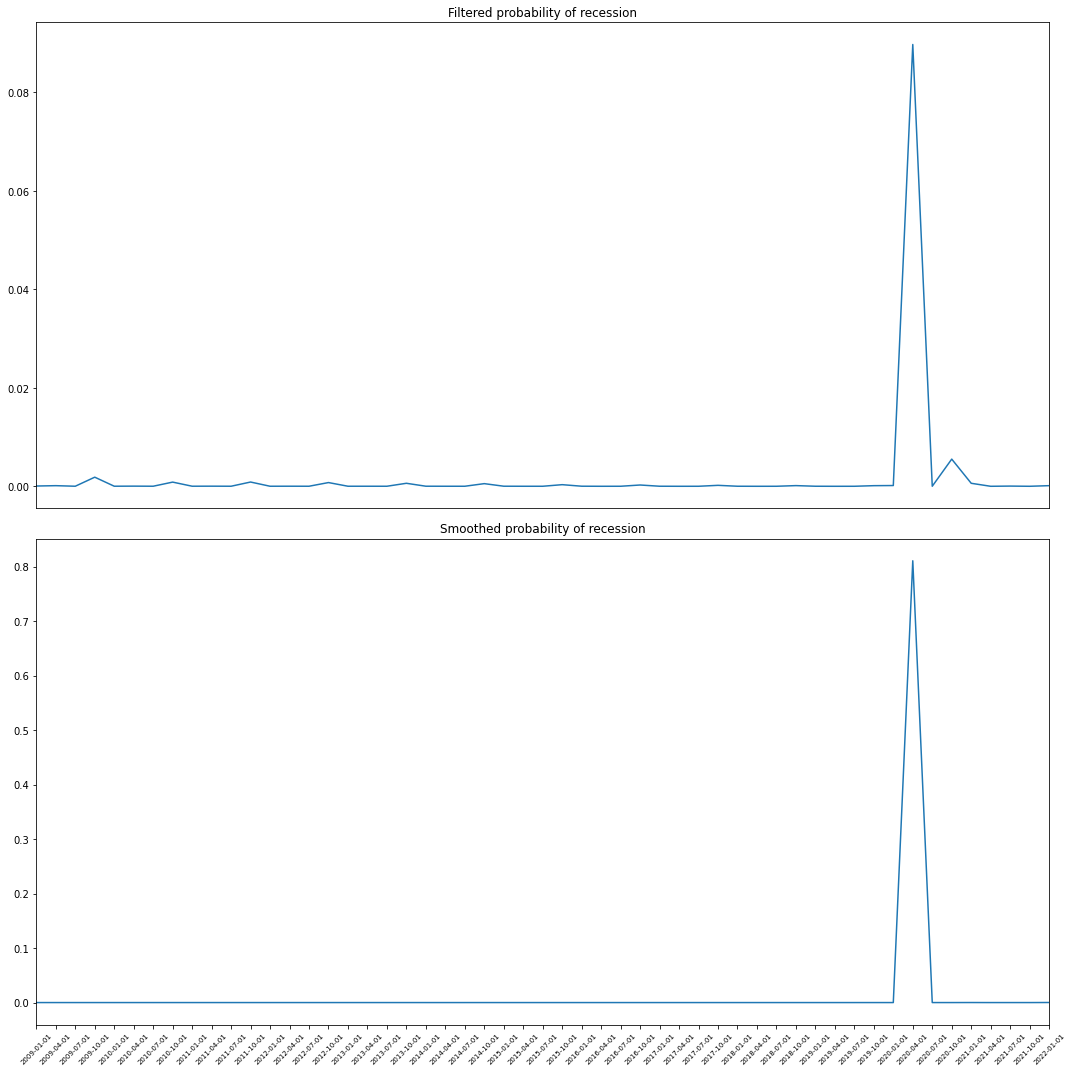

In [ ]:
fig, axes = plt.subplots(2, figsize=(15, 15))
ax = axes[0]
ax.plot(results.filtered_marginal_probabilities[0],)
ax.set_xticks([])
ax.set_xlim(data.index[4], data.index[-1])
ax.set(title="Filtered probability of recession")

ax = axes[1]
ax.plot(results.smoothed_marginal_probabilities[0])

ax.set_xlim(data.index[4], data.index[-1])
ax.set(title="Smoothed probability of recession")

plt.xticks(rotation=45, fontweight='light',  fontsize='x-small')
fig.tight_layout()

#Test Without 2020

In [ ]:
dates = data[0:48]

Text(0, 0.5, 'GDP Indonesia')

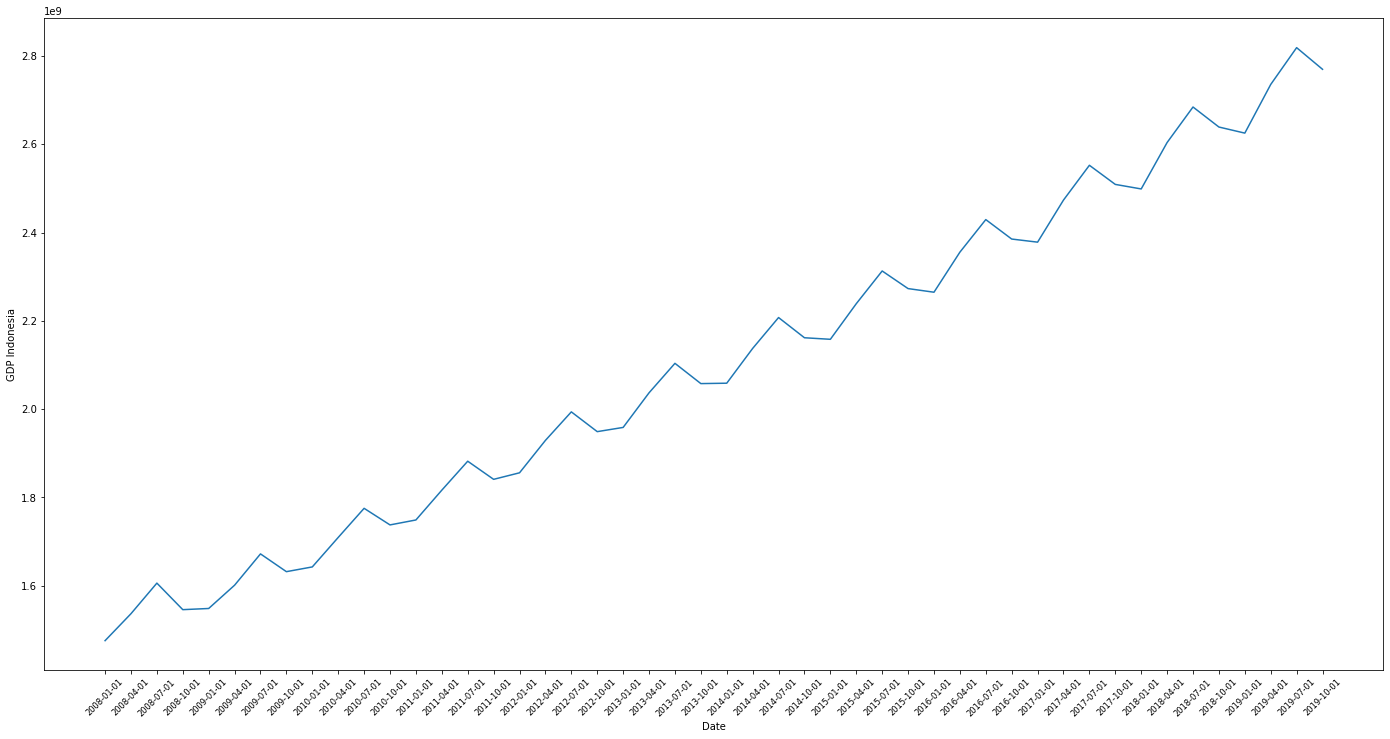

In [ ]:
plt.figure(figsize=(24,12))
plt.xticks(rotation=45, fontweight='light',  fontsize='small')
sns.lineplot(data=dates,x=dates.index,y=dates.NGDPRNSAXDCIDQ)
plt.ylabel("GDP Indonesia")

(0.9511918275185036, True)

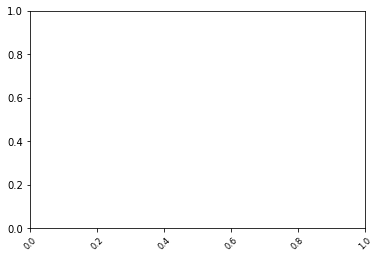

In [ ]:
adf_test = ADFTest(alpha=0.05)
plt.xticks(rotation=45, fontweight='light',  fontsize='small')
type(adf_test)
adf_test.should_diff(dates['NGDPRNSAXDCIDQ'])

In [ ]:
train = dates[:44]
test = dates[44:]

In [ ]:
model = auto_arima(train['NGDPRNSAXDCIDQ'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                   random_state=22,
                   seasonal=True,
                   D=1,
                   m=4,
                   stationary=False)
model.fit(train['NGDPRNSAXDCIDQ'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=1342.041, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1329.004, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1328.427, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=1329.790, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=1328.603, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=1330.417, Time=0.33 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=1330.429, Time=0.47 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=1328.425, Time=0.22 sec
 ARIMA(1,1,0)(0,1,2)[4]             : AIC=inf, Time=0.91 sec
 ARIMA(1,1,0)(1,1,2)[4]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=1337.968, Time=0.08 sec
 ARIMA(2,1,0)(0,1,1)[4]             : AIC=1330.338, Time=0.32 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=inf, Time=0.78 sec
 ARIMA(2,1,1)(0,1,1)[4]             : AIC=1323.744, Time=0.64 sec
 ARIMA(2,1,1)(0,1,0)[4]             : AIC=1321.9

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 4),
      suppress_warnings=True, with_intercept=False)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   44
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 4)   Log Likelihood                -651.845
Date:                            Sun, 03 Jul 2022   AIC                           1313.691
Time:                                    14:59:18   BIC                           1322.008
Sample:                                         0   HQIC                          1316.675
                                             - 44                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5512      0.317      1.740      0.082      -0.070       1.172
ar.L2         -0.0037      0.168     -0.022      0.983      -0.334       0.326
ar.L3         -0.0127      0.093     -0.137      0.891      -0.194       0.169
ma.L1         -0.5510      0.331     -1.665      0.096      -1.200       0.098
sigma2      2.349e+13   7.67e-15   3.06e+27      0.000    2.35e+13    2.35e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.22   Prob(JB):                         0.89
Heteroskedasticity (H):               1.72   Skew:                             0.18
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.29e+43. Standard errors may be unstable.
"""

In [ ]:
adf_test.should_diff(model.resid())

(0.01, False)

In [ ]:
import scipy.stats as stats
stats.jarque_bera(model.resid())

(654.1056811215792, 0.0)

In [ ]:
sm.stats.acorr_ljungbox(model.resid(), lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,12.593403,0.027502


In [ ]:
forecast = model.predict(n_periods=4)
forecast = pd.DataFrame(forecast,index = ['2019-01-01','2019-04-01','2019-07-01', '2019-10-01'],columns=['Prediction'])

In [ ]:
forecast

,Prediction
2019-01-01,2.628549e+09
2019-04-01,2.733610e+09
2019-07-01,2.814064e+09
2019-10-01,2.768690e+09


In [ ]:
test

,NGDPRNSAXDCIDQ
Date,
2019-01-01,2.625180e+09
2019-04-01,2.735414e+09
2019-07-01,2.818813e+09
2019-10-01,2.769748e+09


In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
MAPE(test['NGDPRNSAXDCIDQ'],forecast['Prediction'])

0.10023646747265037

In [ ]:
from sklearn.linear_model import LinearRegression

LR_MAPE= MAPE(test['NGDPRNSAXDCIDQ'],forecast['Prediction'])
print("MAPE: ",LR_MAPE)

MAPE:  0.10023646747265037


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 <a list of 48 Text major ticklabel objects>)

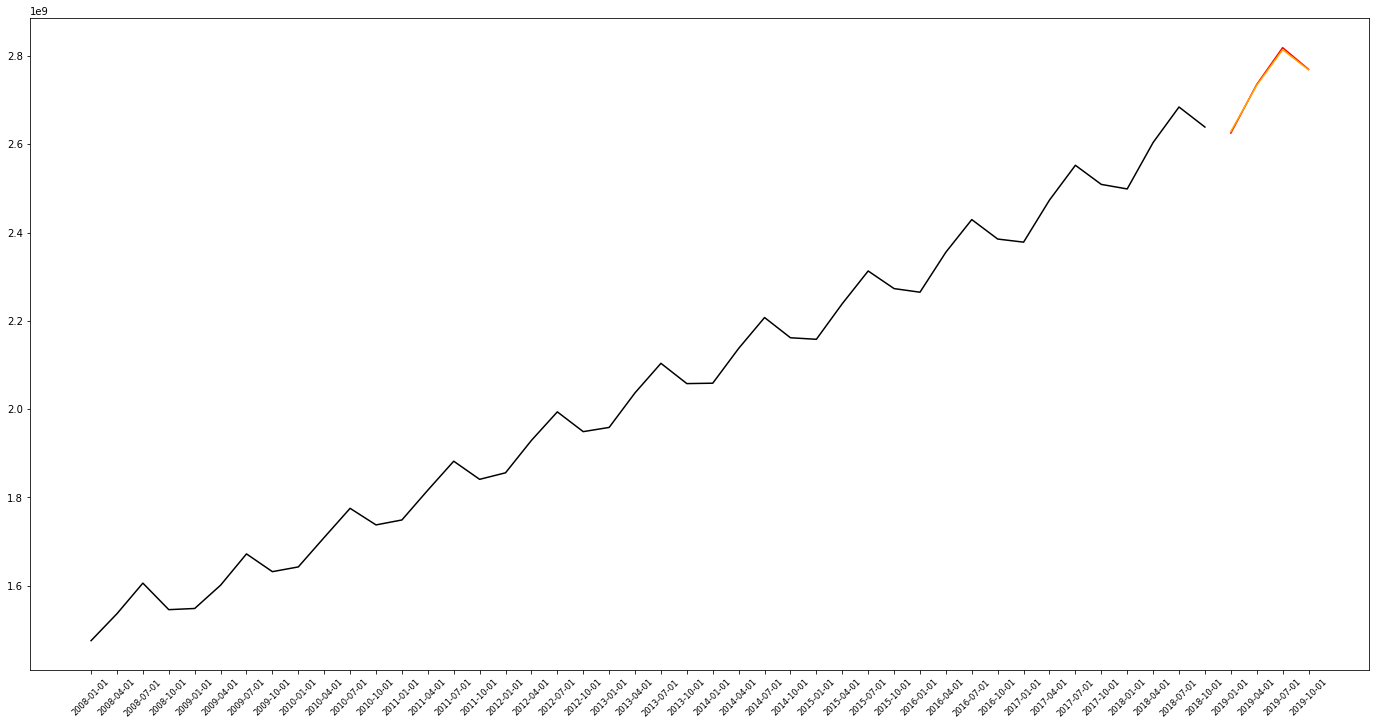

In [ ]:
import numpy as np
plt.figure(figsize=(24,12))

plt.plot(train['NGDPRNSAXDCIDQ'], color = "black")

plt.plot(test['NGDPRNSAXDCIDQ'], color = "red")
plt.plot(forecast['Prediction'],color="orange")
plt.xticks(rotation=45, fontweight='light',  fontsize='small')

In [ ]:
forecast = model.predict(n_periods=20)
forecast = pd.DataFrame(forecast,index = ['2019-01-01','2019-04-01','2019-07-01', '2019-10-01','2020-01-01','2020-04-01','2020-07-01','2020-10-01','2021-01-01','2021-04-01','2021-07-01','2021-10-01','2022-01-01','2022-04-01','2022-07-01','2022-10-01','2023-01-01','2023-04-01','2023-07-01','2023-10-01'],columns=['Prediction'])

In [ ]:
forecast

,Prediction
2019-01-01,2.628549e+09
2019-04-01,2.733610e+09
2019-07-01,2.814064e+09
2019-10-01,2.768690e+09
2020-01-01,2.758264e+09
2020-04-01,2.863323e+09
2020-07-01,2.943775e+09
2020-10-01,2.898400e+09
2021-01-01,2.887974e+09
2021-04-01,2.993033e+09


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 <a list of 64 Text major ticklabel objects>)

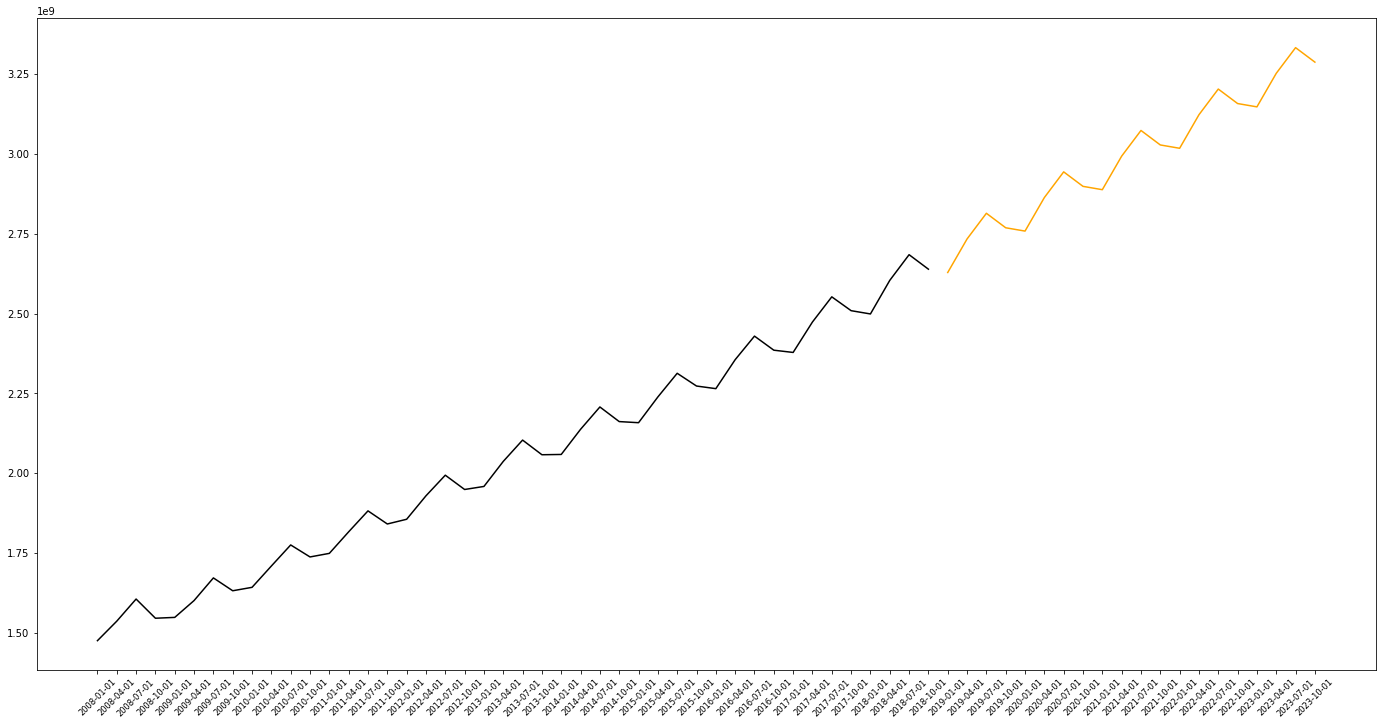

In [ ]:
import numpy as np
plt.figure(figsize=(24,12))

plt.plot(train['NGDPRNSAXDCIDQ'], color = "black")

plt.plot(forecast['Prediction'],color="orange")
plt.xticks(rotation=45, fontweight='light',  fontsize='small')

#Differenced <2020

In [ ]:
dates = dates.diff()

In [ ]:
dates.dropna(inplace=True)

Text(0, 0.5, 'GDP Indonesia')

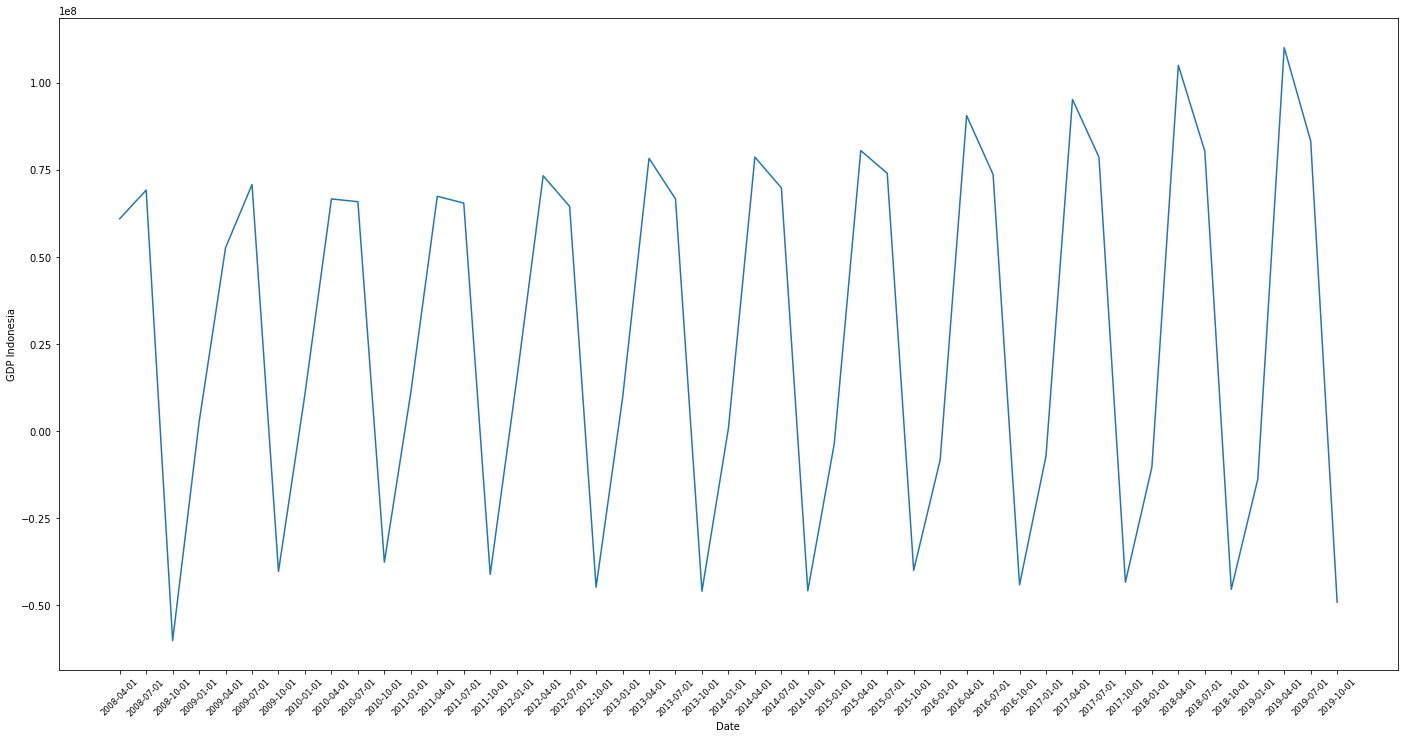

In [ ]:
plt.figure(figsize=(24,12))
sns.lineplot(data=dates,x=dates.index,y=dates.NGDPRNSAXDCIDQ)
plt.xticks(rotation=45, fontweight='light',  fontsize='small')
plt.ylabel("GDP Indonesia")

In [ ]:
adf_test = ADFTest(alpha=0.05)
type(adf_test)
adf_test.should_diff(dates['NGDPRNSAXDCIDQ'])

(0.5203984369947777, True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dates['NGDPRNSAXDCIDQ'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.678069
p-value: 0.442446
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604


In [ ]:
train = dates[:44]
test = dates[44:]

In [ ]:
model = auto_arima(train['NGDPRNSAXDCIDQ'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                   random_state=22,
                   seasonal=True,
                   D=1,
                   m=4,
                   stationary=False)
model.fit(train['NGDPRNSAXDCIDQ'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=1370.674, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=1361.924, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=1359.611, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=1361.203, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=1362.265, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=1363.862, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=1361.511, Time=0.08 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=1361.561, Time=0.10 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=1359.921, Time=0.05 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=1363.500, Time=0.19 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=1358.408, Time=0.04 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=1360.151, Time=0.05 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=1360.355, Time=0.07 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=1358.634, Time=0.03 sec
 ARIMA(0,0,0)(2,1,1)[4] intercept

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 4),
      suppress_warnings=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   44
Model:             SARIMAX(1, 1, 0, 4)   Log Likelihood                -676.204
Date:                 Sun, 03 Jul 2022   AIC                           1358.408
Time:                         14:59:22   BIC                           1363.474
Sample:                              0   HQIC                          1360.239
                                  - 44                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.339e+06   9.77e+05      1.371      0.170   -5.76e+05    3.25e+06
ar.S.L4       -0.1155      0.035     -3.298      0.001      -0.184      -0.047
sigma2      3.243e+13      0.033    9.8e+14      0.000    3.24e+13    3.24e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.49   Prob(JB):                         0.58
Heteroskedasticity (H):               0.64   Skew:                             0.33
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.4e+30. Standard errors may be unstable.
"""

In [ ]:
model.predict_in_sample()

array([  1200580.87733365,   1200580.87733364,   1200580.87733363,
         1200580.87733365,  55367731.71236886,  62638379.16625229,
       -51840817.9377296 ,   3682902.15436899,  55059367.6224318 ,
        72058358.01152153, -41194940.36146908,  11144880.76452516,
        66495912.9950932 ,  67886124.09212759, -36543230.09752393,
        12482859.67817121,  68788319.47663689,  66966538.19612655,
       -39321312.583407  ,  15717704.57125509,  74096106.97605744,
        66064648.60313039, -43011566.17249261,  11489028.16763791,
        79184843.39424787,  67870351.8677277 , -44440682.03354831,
         3235198.13246755,  80096107.26728144,  70930354.7609839 ,
       -44465638.65064962,  -1663898.95615829,  81788388.11586517,
        74995419.66933726, -39253840.08071771,  -6326576.42709023,
        90901330.73220326,  75192217.97098118, -42254109.55086181,
        -5836032.80760995,  96169526.22788219,  79549383.54784273,
       -42072236.72618456,  -8561608.29396252])

In [ ]:
forecast = model.predict(n_periods=10)
forecast = pd.DataFrame(forecast,index = ['2019-04-01', '2019-07-01','2019-10-01','2020-01-01','2020-04-01','2020-07-01','2020-10-01','2021-01-01','2021-04-01','2021-07-01'],columns=['Prediction'])

In [ ]:
import scipy.stats as stats
stats.jarque_bera(model.resid())
sm.stats.acorr_ljungbox(model.resid(), lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,3.827399,0.574524


In [ ]:
sm.stats.acorr_ljungbox(model.resid(), lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,3.827399,0.574524


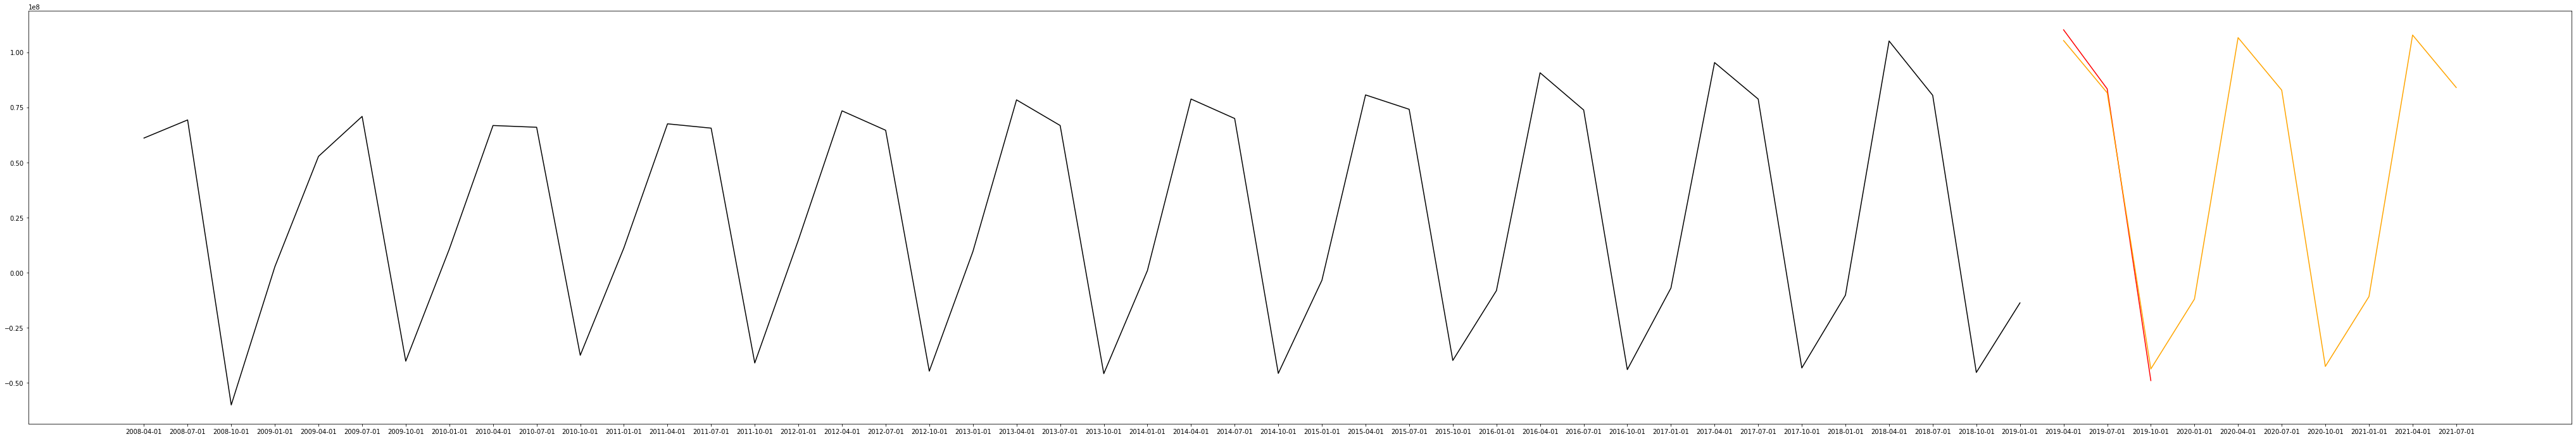

In [ ]:
plt.figure(figsize=(72,12))

plt.plot(train['NGDPRNSAXDCIDQ'], color = "black")

plt.plot(test['NGDPRNSAXDCIDQ'], color = "red")
plt.plot(forecast['Prediction'],color="orange")